# Principle Component Analysis: Figure 4.21

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Create some two-dimensional data

(-2.504257980305555, 3.2812563628063147, -3.385120954509731, 4.669314548801172)

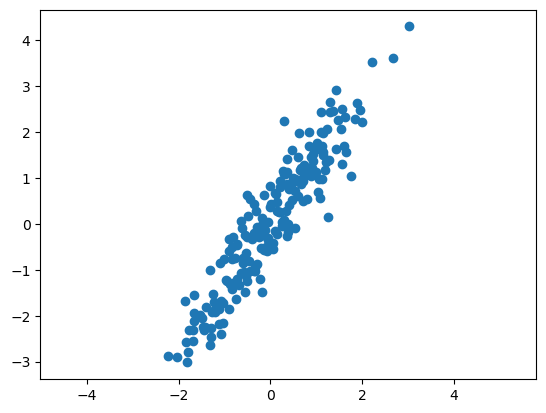

In [2]:
# 200 reproducable random points
rng = np.random.RandomState(3)
X = np.dot(rng.rand(2, 3), rng.randn(3, 200)).T
plt.scatter(X[:, 0], X[:, 1])
# Assure 1x1 aspect ratio
plt.axis('equal')

## Standard PCA analysis. Ask for 2 components 

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X)

Print the components and how well they explain the data.
Note that output VECTORS are the components!

In [4]:
print(f"principle components are:\n{pca.components_}")
print(f"Explained variance are:\n{pca.explained_variance_}")
print(f"PCA mean is:\n{pca.mean_}")

# arrow start points
o1_x = pca.mean_[0]
o1_y = pca.mean_[1]
o2_x = o1_x
o2_y = o1_y

# arrow end points
e1_x = o1_x + pca.components_[0, 0]
e1_y = o1_y + pca.components_[1, 0]
e2_x = o2_x + pca.components_[0, 1]
e2_y = o2_y + pca.components_[1, 1]

principle components are:
[[ 0.5549224   0.83190212]
 [ 0.83190212 -0.5549224 ]]
Explained variance are:
[3.077572   0.09130073]
PCA mean is:
[0.01599553 0.05747391]


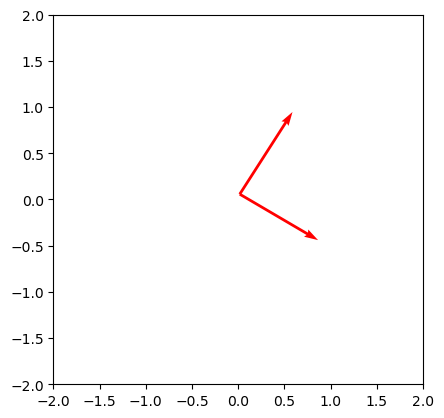

In [5]:
# Plot of the two principle directions
fig, ax = plt.subplots()
ax.quiver([o1_x, o2_x], [o1_y, o2_y], [e1_x, e2_x], [e1_y, e2_y],
          angles='xy', scale_units='xy', scale=1, color="r")
ax.set_aspect(1)
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
plt.show()

In [6]:
# Convenience plotting method
def draw_vector(v0, v1, ax=0):
    ax = ax or plt.gca()
    arrowProps = dict(arrowstyle='->', linewidth=3,
                      shrinkA=0, color='black', shrinkB=0)
    ax.annotate("", v1, v0, arrowprops=arrowProps)

## Figure 4.21

(-2.504257980305555, 3.2812563628063147, -3.385120954509731, 4.669314548801172)

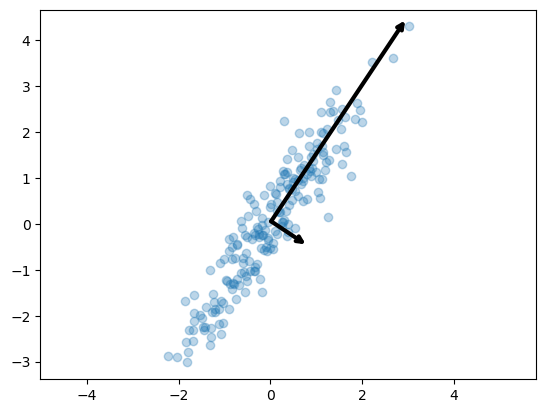

In [7]:
plt.scatter(X[:, 0], X[:, 1], alpha=0.3)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal')

## Same exercise using the covariance matrix X^T X 

In [8]:
# Note: X has to be zero mean

In [9]:
X_zm = X - np.array([X[:, 0].mean(), X[:, 1].mean()])
assert np.alltrue(X_zm.mean(axis=0) < np.array([0.00001, 0.00001]))

In [10]:
from numpy import linalg as LA
XTX = X_zm.T.dot(X_zm)
XTX_val, XTX_vec = LA.eig(XTX)

Compare with PCA values above

In [11]:
print(f"eigenvectors are:\n{XTX_vec}")
print(f"eigenvalues are:\n{XTX_val}")
print(f"X mean is:\n{X.mean(axis=0)}")

eigenvectors are:
[[-0.83190212 -0.5549224 ]
 [ 0.5549224  -0.83190212]]
eigenvalues are:
[ 18.16884568 612.43682747]
X mean is:
[0.01599553 0.05747391]


In [12]:
# arrow start points
xtx_o1_x = X.mean(axis=0)[0]
xtx_o1_y = X.mean(axis=0)[1]
xtx_o2_x = xtx_o1_x
xtx_o2_y = xtx_o1_y

# arrow end points
xtx_e1_x = xtx_o1_x + XTX_vec[0, 0] * (-1)
xtx_e1_y = xtx_o1_y + XTX_vec[1, 0] * (-1)
xtx_e2_x = xtx_o2_x + XTX_vec[0, 1] * (-1)
xtx_e2_y = xtx_o2_y + XTX_vec[1, 1] * (-1)

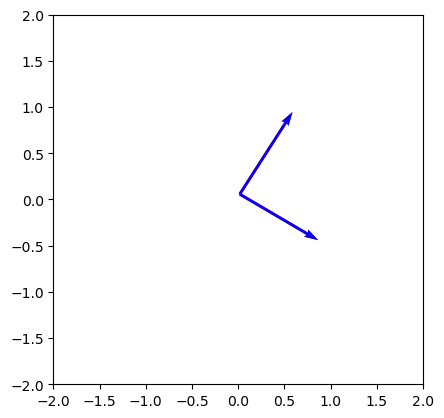

In [13]:
fig, ax = plt.subplots()
ax.quiver([o1_x, o2_x], [o1_y, o2_y], [e1_x, e2_x], [e1_y, e2_y],
          angles='xy', scale_units='xy', scale=1, color="r")
ax.quiver([xtx_o1_x, xtx_o2_x], [xtx_o1_y, xtx_o2_y], [xtx_e1_x, xtx_e2_x], [
          xtx_e1_y, xtx_e2_y], angles='xy', scale_units='xy', scale=1, color="b")
ax.set_aspect(1)
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
plt.show()